In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.constants as c
import astropy.units as u
import sys
from scipy.optimize import bisect

### see KoyInut function in cool.c

In [2]:
mbar = (1.37)*(1.6733e-24)*u.g
kb = 1.380658e-16*u.erg/u.K
HeatRate = 2.0e-26*u.erg/u.s
Tmin = 10*u.K
def KI02(T):
    return (1.0e7*np.exp(-1.184e5/(T+1000.)) + 0.014*np.sqrt(T)*np.exp(-92/T))*2e-26*u.erg/u.s*u.cm**3
def pe(T,U=1):
    return HeatRate*U
def cr(zeta16):
    """eq. (30.3) in Draine"""
    return 1.03e-27*zeta16*u.erg/u.s

# Equilibrium curve

(10000.0, 10000000.0)

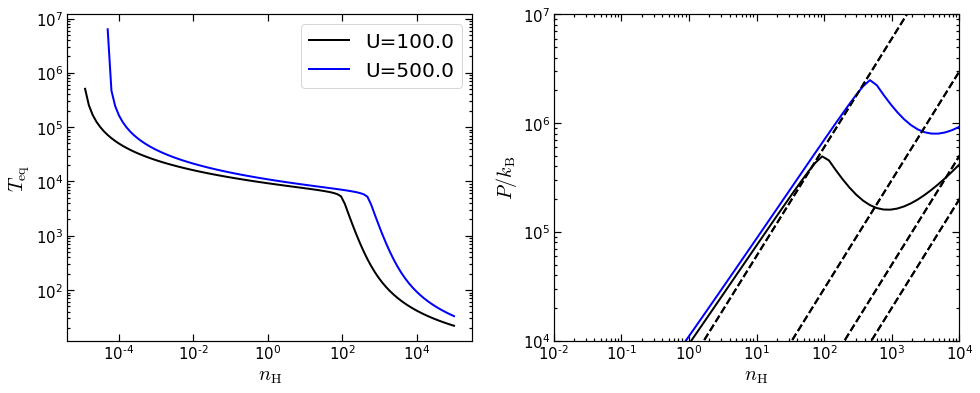

In [3]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

U=[1e0,1e1,1e2,5e2]
#for j in [0,1,2]:
for j in [2,3]:
    zeta16=0
    den = np.logspace(-5,5,100)/u.cm**3
    Teq = np.zeros(len(den))
    for i in range(len(den)):
        try:
            res = bisect(lambda T: (den[i]*den[i]*KI02(T)-den[i]*(pe(T,U=U[j])+cr(zeta16))).value, 1e1,1e7)
            Teq[i] = res
        except:
            Teq[i] = np.nan
    Teq *= u.K
    prs = den*Teq
    ax[0].loglog(den,Teq,'-',label="U="+str(U[j]))
    ax[1].loglog(den,prs,'-',label="U="+str(U[j]))
    ax[1].loglog(den,20*den*u.K,'k--')
    ax[1].loglog(den,50*den*u.K,'k--')
    ax[1].loglog(den,300*den*u.K,'k--')
    ax[1].loglog(den,6000*den*u.K,'k--')
    
#    zeta16=10
#    den = np.logspace(-2,5)
#    Teq = np.zeros(len(den))    
#    for i,n in enumerate(den):
#        n /= u.cm**3
#        try:
#            res = bisect(lambda T: (n*n*KI02(T)-n*(pe(T,U=U[j])+cr(zeta16))).value, 1e1,1e7)
#            Teq[i] = res
#        except:
#            Teq[i] = np.nan
#    Teq *= u.K
#    den /= u.cm**3
#    prs = den*Teq
#    ax[0].loglog(den,Teq,'--')
#    ax[1].loglog(den,prs,'--')
    
    
ax[0].legend()
ax[0].set_xlabel(r"$n_{\rm H}$")
ax[0].set_ylabel(r"$T_{\rm eq}$")
ax[1].set_xlabel(r"$n_{\rm H}$")
ax[1].set_ylabel(r"$P/k_{\rm B}$")
ax[1].set_xlim(1e-2,1e4)
ax[1].set_ylim(1e4,1e7)